# Derek Anderson, Justin Dygert, Cameron Miller
## NYC Property EDA

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
rand_state = 1000

In [32]:
df = pd.read_csv('nyc-rolling-sales.csv')
df_raw = df
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


#### Classifying Columns

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

It appears that there are only two data types, objects and ints. These should be classified to more meaningful types for our analysis. 

In [34]:
# get rid of pointless column
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [35]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [36]:
# classify our columns

categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
                'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 
                'BUILDING CLASS AT TIME OF SALE']
numerics = ['BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 
            'GROSS SQUARE FEET', 'SALE PRICE']

for col in categoricals:
    df[col] = df[col].astype("category")
    
for col in numerics:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [37]:
# create date-time variable
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors = 'coerce')
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,6871
2,0,6323
3,0,7705
4,0,6402
5,0,7461
6,0,8293
7,0,6319
8,0,5681
9,7779,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

#### Null, Blank, and Duplicate Values

In [39]:
# Replace blank values with NA Then check the  percentage of NA

df.replace(' ', np.nan, inplace = True)
df.isnull().sum()/ len(df) * 100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
sale_year                           0.000000
sale_month

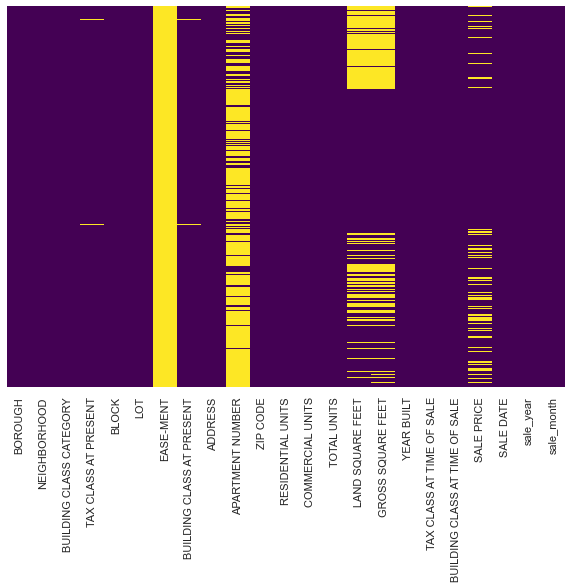

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [41]:
# Easement has nothing so it will be dropped. Apartment number has a ton of NA so just drop it

df.drop(['EASE-MENT', 'APARTMENT NUMBER'], inplace = True, axis = 1)

In [42]:
# Drop the na from the other values, they can be explained and are not helpful for out analysis

df = df.dropna()

In [43]:
# Check for Duplicates

sum(df.duplicated())

348

In [44]:
df = df.drop_duplicates(df.columns, keep = 'last')

In [45]:
# There are a lot of '-' values instead of 0, so we should replace those.

df.replace({'-':0}, inplace = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47544 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         47544 non-null  category      
 1   NEIGHBORHOOD                    47544 non-null  category      
 2   BUILDING CLASS CATEGORY         47544 non-null  category      
 3   TAX CLASS AT PRESENT            47544 non-null  category      
 4   BLOCK                           47544 non-null  int64         
 5   LOT                             47544 non-null  int64         
 6   BUILDING CLASS AT PRESENT       47544 non-null  category      
 7   ADDRESS                         47544 non-null  object        
 8   ZIP CODE                        47544 non-null  category      
 9   RESIDENTIAL UNITS               47544 non-null  int64         
 10  COMMERCIAL UNITS                47544 non-null  int64         
 11  TO

#### More Cleaning

In [47]:
# Checking the description of all the variables

temp = df.copy()
for cols in temp.columns:
    temp[cols]=pd.to_numeric(temp[cols], errors = 'coerce')
    
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,47544.0,3.256836e+00,9.049520e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
NEIGHBORHOOD,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,42401.0,1.428646e+00,8.524710e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
BLOCK,47544.0,4.993789e+03,3.431769e+03,1.000000e+00,2.218000e+03,4.666000e+03,6.983750e+03,1.631900e+04
LOT,47544.0,2.278511e+02,4.906937e+02,1.000000e+00,2.100000e+01,4.500000e+01,9.000000e+01,9.009000e+03
BUILDING CLASS AT PRESENT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,47544.0,1.098669e+04,8.016274e+02,0.000000e+00,1.047000e+04,1.121700e+04,1.123800e+04,1.169400e+04
RESIDENTIAL UNITS,47544.0,2.553656e+00,1.723198e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.844000e+03


There appear to be some nonsense values. Sale price, year built, and total units have minimums of 0. This doesnt make sense, im fairly certain these properties have some sort of structure on them so there cannot be 0 total units. Also, how can a structure on a property in New York be built in year 0? How can the selling price of a property be 0? Let's visualize these variables and see what's going on.

#### Data Visualization

Let's start with the target variable, sale price.

<Figure size 864x432 with 0 Axes>

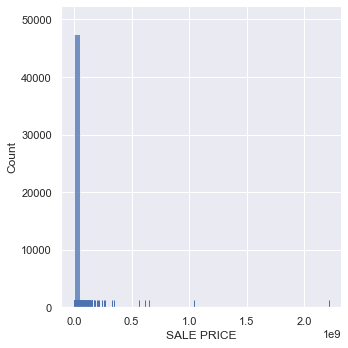

In [48]:
plt.figure(figsize = (12,6))
sns.displot(df['SALE PRICE'], bins = 40, rug = True)
plt.show()

In [49]:
# That's a lot of 0's!

df[(df['SALE PRICE'] < 10000) | (df['SALE PRICE'] > 10000000)]['SALE PRICE'].count() / len(df)

0.24310112737674575

There appear to be a lot of values at 0 as well as a couple of very high variables. The 0's can be explained by deed's being transferred with no money being exchanged, such as someone inheriting a will. These observations are not helpful for our analysis nor are the values on the other extreme, all should be dropped. As was seen, about 25% of the the observations were below 10000 dollars, or above 10000000 dollars. 

<Figure size 864x432 with 0 Axes>

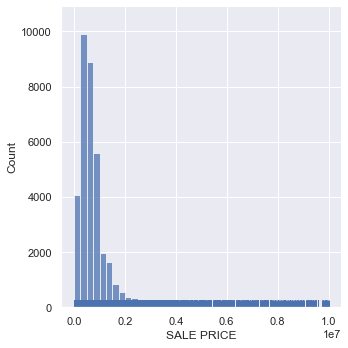

In [50]:
# dropping extreme values

df2 = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

# plotting new dataframe


plt.figure(figsize = (12,6))
sns.displot(df2['SALE PRICE'], bins = 40, rug = True)
plt.show()

That's much better! If we wanted to, we could normalize this with a log transform, but for now we will leave it. Let's take a look at year built.

In [51]:
# Check how many obs are 0 for year count

df2['YEAR BUILT'].value_counts()

1920    3459
1930    2796
1925    2604
1910    1842
1950    1675
        ... 
1829       0
1826       0
1111       0
1680       0
1840       0
Name: YEAR BUILT, Length: 158, dtype: int64

These values of 0 just make no sense for our analysis and should be removed.

C:\Users\derek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YEAR BUILT', ylabel='Density'>

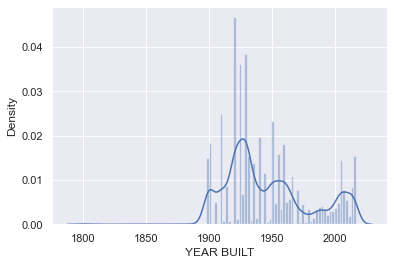

In [52]:
# dropping values

df3 = df2[df2['YEAR BUILT'] != 0]

#plotting result

sns.distplot(df3['YEAR BUILT'], bins = 100)

Ahh, much better! Finally, let's look at Total Units.

In [53]:
df3['TOTAL UNITS'].value_counts()

1      16282
2       9756
0       3430
3       2823
4        754
       ...  
63         1
50         1
159        1
462        1
128        1
Name: TOTAL UNITS, Length: 94, dtype: int64

These values of 0 again do not make sense and should be dropped.

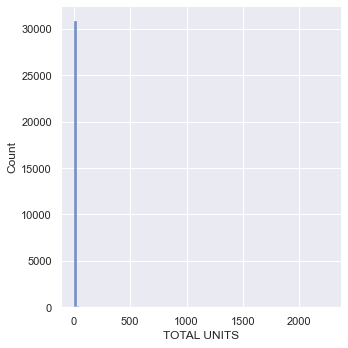

In [54]:
# dropping values

df4 = df3[df3['TOTAL UNITS'] != 0]

# plotting new TOTAL UNITS

sns.displot(df4['TOTAL UNITS'], bins = 100)

In [55]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
BLOCK,31046.0,5333.734909,3.756669e+03,1.0,2300.75,4743.0,7589.75,16319.0
LOT,31046.0,184.279038,3.830487e+02,1.0,22.00,44.0,82.75,3710.0
RESIDENTIAL UNITS,31046.0,2.248083,1.487344e+01,0.0,1.00,1.0,2.00,1844.0
COMMERCIAL UNITS,31046.0,0.205888,1.292592e+01,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,31046.0,2.458127,1.977700e+01,1.0,1.00,1.0,2.00,2261.0
LAND SQUARE FEET,31046.0,3361.888842,3.029225e+04,0.0,1825.00,2433.0,3575.00,4228300.0
GROSS SQUARE FEET,31046.0,2798.418283,2.472449e+04,0.0,1216.00,1710.0,2444.00,3750565.0
SALE PRICE,31046.0,934627.478065,1.074874e+06,10001.0,440425.00,645000.0,975000.00,9999999.0


Last bit of cleaning is to get rid of some variables that are irrelevant for our analysis (block, lot, and address), and then changing the numbers in the Borough variable to the actual names of the Buroughs.

In [56]:
# dropping irrelevant columns

df4.drop(['LOT', 'BLOCK', 'ADDRESS'], axis = 1, inplace = True)

#1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island

df4['BOROUGH'] = df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
df4.head()

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\derek\AppData\Local\Temp/ipykernel_8388/280238132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['BOROUGH'] = df4['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017,7
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016,11
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11


#### Data Exploration

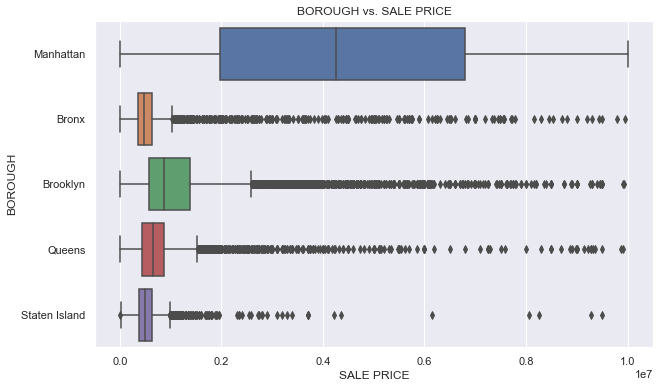

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'SALE PRICE', y = 'BOROUGH', data = df4)
plt.title('BOROUGH vs. SALE PRICE')
plt.show()

This plot shows the boxplots for sale price in each borough. As can be seen, Manhattan varies greatly across all prices. The remaining boroughs are all right skewed.

I wanted to do some sort of plot with with the neighborhoods, but anything I tried was just messy because there are so many neighborhoods. I did some looking of Kaggle and found an EDA that took 20 neighborhoods and compared the average property price in those neighborhoods. It took some time to adapt their code to mine, but I got it! The original EDA claims to have found the top 20 most expensive neighborhoods, but I looked at the documentation for the collections and counter class, and those classes are just used for list manipulation pretty much. So the neighborhood list that is created is a list of the 20 neighborhoods that show up the most in the dataframe.

In [28]:
# I found this in another EDA on Kaggle and thought it was an interesting plot
# kaggle.com/eric8395/nyc-property-sales-eda-analysis-w-regression

from collections import Counter
neighborhood = list(dict(Counter(df4['NEIGHBORHOOD']).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(df4['SALE PRICE'][df4['NEIGHBORHOOD'] == i])
    avg_sale_prices.append(avg_price)

Text(0.5, 1.0, 'Average Propert Price in the Top 20 Neighborhoods')

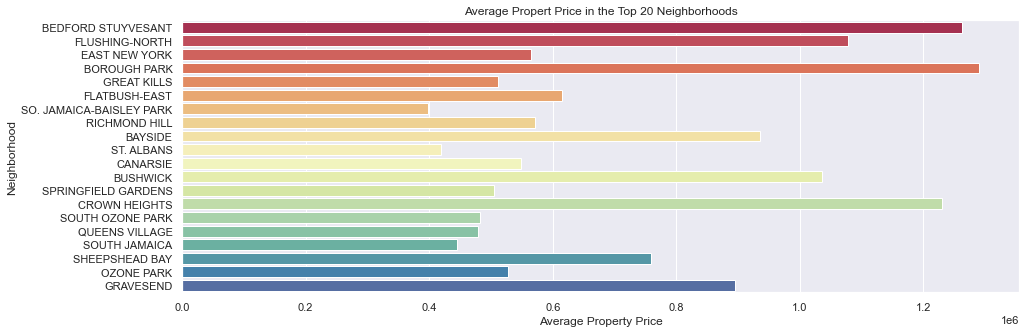

In [29]:
plt.figure(figsize = (15,5))

ax = sns.barplot(x = avg_sale_prices, y = neighborhood, ci = None, palette = 'Spectral')
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Propert Price in the Top 20 Neighborhoods')